## The Iris Data Set
**************
- Loading the data set from [Seaborn Github](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv)\
- Pandas to_markdown() function was used to make the summary statistics into a neat, readable textfile. df.decribes gives the summary stats of the sdata setframe - returns it in a Pandas data frame. 

**References/Links:**
*Include maybe some links to documentation?*  
1. Overview of the Data 
- Text file containing a summary of each numeric variable available, to provide an overview of the Iris Data set and the types of variables in it.
    - https://realpython.com/working-with-files-in-python/ 
    - https://pypi.org/project/tabulate/
    - https://stackoverflow.com/questions/66236289/how-do-you-control-float-formatting-when-using-dataframe-to-markdown-in-pandas

2. Exploratory Analysis
- EDA first step in order to get an overview of the data, to identify anomalies and ensure the data set has been loaded in correctly.
- Histograms of each the numeric variables in the data frame were made in order to visualise and explore the distribution of each of the numeric variables.
- Histograms are a good way to present continuous data, as they provide a visualisation of:
    - Where the distribution is centered
    - The spread of the distribution
    - The shape of the distribution  
- Link to article on [Real Python: Python Plotting With Matplotlib Guide](https://realpython.com/python-matplotlib-guide/) to get familiar with the objecct oriented approach to using matplotlib
- [Tutorial on Matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py) was followed to generate the bar chart, with the mean of each numeric attribute by species 


For Running these in the notebook: https://www.w3schools.com/python/python_modules.asp https://realpython.com/python-modules-packages/ 

3. Correlations
- Explore the correlations in the numeric data using Pandas ````.corr```` returns a correlation matrix of numeric columns. ([W3 Schools.](https://www.w3schools.com/python/pandas/pandas_correlations.asp))
- Necessary to have a numeric data frame first: Reference: Also W3 Schools! (https://www.w3schools.com/python/pandas/ref_df_select_dtypes.asp)
- .corr returns a PD data frame that can be indexed using .loc (https://www.w3schools.com/python/pandas/pandas_dataframes.asp)
- wanted to plot a line of best fit and report the r value for the linear regressions in each scatterplot .. blah bla explain more!! 
- wanted the 
**************

- Bar charts and box plots were plotted to explore the differences in penguin attributes between species.
- Box plots ! References? Seaborn - Wanted to explore the differences in petal length and sepal length between species as these seemed to vary most ... 
**Interpretation of Box Plot**
- Box plots are a useful plot to determine the spread of data within a group and identify potential outliers. 
- The boxes represent the interquartile range. The box limits represent the spread of the central 50% of the data. 
- The Virginica species has the longest box, indicating a greater variance (or, wider spread) of the data points within the group. There is a wider spread of petal lengths within the Virginica species of Iris.  
- The horizontal lines in the boxes are the median line. The group median petal length for the Setosa species is the lowest, and the least variance is seen in this group. 
- Versicolour and virginica both have higherr group median
- The whiskers extend to the furthest data point in the data set that is within $ \pm 1.5\times $ IQR. 
- Outliers are represented by points that fall outside the boxplot whiskers. Versicolour species has one outliers, one plant has a petal length significantly smaller than others of that species measured.
- Setosa sepcies has 4 outliers 

### Sspecies vs Petal Length: 
**Students *t*-test**
*******************
- A students *t*-test is used to explore how the distribution of the response (e.g. petal length) differs across groups (species). 
- Below, an Independent Two Samples t-test is used to determine if there is a correlation between petal length and species through assessing whether differences in body mass between the two sexes are statistically significant. 
- An **Independent Samples *t*-test** should be performed to determine the statistical significance of this difference in group means.
- **Interpretation of the Independent Samples *t*-test**
- $\alpha$ = 0.05: This is the significance level. There is a 5% chance that the null hypothesis will be incorrectly accepted or rejected. 
- *p*-value $\le$ 0.05: A calculated significance probability less than the predetermined significance level indicates that the null hypothesis should be rejected in favour of the alternative hypothesis that there is a difference in the group means.   
- From the t-test performed, there is a statistically significant difference in petal length between the species. 

In [12]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import os
import seaborn as sb 

#Load Iris.csv into notebook as a variable
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

descriptive_summary_statistics = df.describe().to_markdown(floatfmt='.3f')
species = (df["species"].unique()) # returns a np array with the three species in the data frame
species_means = {
    "Sepal Length": list(df.groupby(["species"])["sepal_length"].mean()), # Returns a Pandas series with the mean of sepal length by species
    "Sepal Width": list(df.groupby(["species"])["sepal_width"].mean()),
    "Petal Length": list(df.groupby(["species"])["petal_length"].mean()),
    "Petal Width": list(df.groupby(["species"])["petal_width"].mean())
}
species_means_df = pd.DataFrame.from_dict(species_means, orient='index', columns=species)


In [ ]:
def histogram(x_value):
    fig, ax = plt.subplots()
    ax.hist(df[x_value], edgecolor = "black")
    ax.set_xlabel(x_value)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Distribution of {x_value} in Iris Data Set")

histogram("sepal_length")

In [ ]:
#Create a dataframe with only the numeric variables:
df_numeric = df.select_dtypes(include = ('number'))
#View the correlations between the continuous, numeric variables 
correlation_matrix = (df_numeric.corr())

type(correlation_matrix)
correlation_matrix

In [ ]:
def scatterplot(x_value, y_value, colour):
    m, c = np.polyfit(                 #Identify the best fit line, y = mx+c, for x vs y, using Numpy's polyfit to do a least squares fit determine m and c
            x = df[x_value], 
            y = df[y_value], 
            deg = 1                    #Degree of the polynomial 
                      ) 
    r_value = correlation_matrix.loc[x_value, y_value] #Get the regression fit from the correlation matrix 

    fig, ax = plt.subplots() # subplot() creates two variables, a matplotlib figure and axis. Assign variable names ax and fig
    scatterplot = ax.scatter(df[x_value], df[y_value], 
                            c = df[colour], #color the scatterplot points by petal width
                            cmap = "viridis") # specify the color map
    
    ax.plot(df[x_value], m*df_numeric[x_value]+c, c = "red", label = f"Linear Regression Fit, R = {r_value:.2f}") # plot the least squares fit line identified in the numpy polyfit 
                                                                                                                      # x value will still be sepal length, y value will be m*x + c
    
    ax.set_xlabel(x_value)
    ax.set_ylabel(y_value)
    ax.set_title(f"{x_value} vs. {y_value} coloured by {colour}")
    fig.colorbar(scatterplot, label = colour)
    ax.legend()
    

scatterplot("sepal_length", "sepal_width", "petal_length")

In [ ]:
correlation_matrix = df.select_dtypes(include = ('number')).corr() #Returns a correlation matrix with the R values for the correlation between each of the numeric values

def scatterplot(x_value, y_value, colour):
    m, c = np.polyfit(                 #Identify the best fit line, y = mx+c, for x vs y, using Numpy's polyfit to do a least squares fit determine m and c
            x = df[x_value], 
            y = df[y_value], 
            deg = 1                    #Degree of the polynomial 
                      ) 
    r_value = correlation_matrix.loc[x_value, y_value] #Get the regression fit from the correlation matrix 

    fig, ax = plt.subplots() # subplot() creates two variables, a matplotlib figure and axis. Assign variable names ax and fig
    fig.subplots_adjust(bottom = 0.2) #Adjust the amount of space available below the plot for a short note about the regression fit
    scatterplot = ax.scatter(df[x_value], df[y_value], 
                            c = df[colour], #color the scatterplot points by petal width
                            cmap = "viridis") # specify the color map
    
    ax.plot(df[x_value], m*df[x_value]+c, c = "red", label = f"Linear Regression Fit, R = {r_value:.2f}") # plot the least squares fit line identified in the numpy polyfit 
                                                                                                                      # x value will still be sepal length, y value will be m*x + c
    
    ax.set_xlabel(x_value)
    ax.set_ylabel(y_value)
    ax.set_title(f"{x_value} vs. {y_value} coloured by {colour}")
    fig.colorbar(scatterplot, label = colour)
    ax.legend()
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[x_value], df[y_value])
    r_square = r_value**2
    string = (f"The observed significance probability for the regression fit of [{x_value}] and {y_value} is {p_value:.3g}.\nThe R squared is {r_square:.2f}.")

    plt.figtext(0,0, string, wrap=True, bbox=dict(boxstyle="round", #Matplotlib documentation: https://matplotlib.org/stable/gallery/text_labels_and_annotations/fancytextbox_demo.html#sphx-glr-gallery-text-labels-and-annotations-fancytextbox-demo-py
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   facecolor="none", edgecolor="green"
                   ))

scatterplot("sepal_length", "petal_length", "sepal_width")

In [9]:
def create_text_file_with_summary_of_variables(filename):
    with open (filename, "w") as a:
            a.write(f'The Iris data set describes the attributes of three species of the Iris flower. \
                    \nSpecies is a categorical variable in the data set. \
                    \nPetal length, petal width, sepal length and sepal width are continuous, numeric variables in the Iris data set. \
                    \nThe table below describes the summary statistics of the continuous numerical variables in the Iris data set. \
                    \n \
                    \n{descriptive_summary_statistics} \
                    \n \
                    \nThe mean of each attribute grouped by species is tabulated below.\n \
                    \n \
                    \n{species_means_df}'
                    )

In [8]:
filename = "newfile!!"
def create_text_file_with_summary_of_variables(filename):
    if os.path.exists(filename):
        new_file = input(f"{filename} already exists in this directory. Would you like to overwrite? (Y/N)")
        if new_file.strip() == "Y":
            with open (filename, "w") as a:
                        a.write(f'The Iris data set describes the attributes of three species of the Iris flower. \
                                \nSpecies is a categorical variable in the data set. \
                                \nPetal length, petal width, sepal length and sepal width are continuous, numeric variables in the Iris data set. \
                                \nThe table below describes the summary statistics of the continuous numerical variables in the Iris data set. \
                                \n \
                                \n{descriptive_summary_statistics} \
                                \n \
                                \nThe mean of each attribute grouped by species is tabulated below.\n \
                                \n \
                                \n{species_means_df}'
                                )
        elif new_file.strip() == "N":
            print(f"Check {filename} in this directory for a summary of the variables in the Iris Dataset. ")
        else:
            print("Please input Y or N")
        new_file = input(f"{filename} already exists in this directory. Would you like to overwrite? (Y/N)")
    else:
        with open (filename, "w") as a:
                        a.write(f'The Iris data set describes the attributes of three species of the Iris flower. \
                            \nSpecies is a categorical variable in the data set. \
                            \nPetal length, petal width, sepal length and sepal width are continuous, numeric variables in the Iris data set. \
                            \nThe table below describes the summary statistics of the continuous numerical variables in the Iris data set. \
                            \n \
                            \n{descriptive_summary_statistics} \
                            \n \
                            \nThe mean of each attribute grouped by species is tabulated below.\n \
                            \n \
                            \n{species_means_df}'
                            )
                        
create_text_file_with_summary_of_variables(filename)

In [30]:
# if else doesn't run again if you input incorrect answer 

filename = "newfile!!.txt"

def create_text_file_with_summary_of_variables(filename):
    with open (filename, "w") as a:
            a.write(f'OVERWRITE The Iris data set describes the attributes of three species of the Iris flower. \
                    \nSpecies is a categorical variable in the data set. \
                    \nPetal length, petal width, sepal length and sepal width are continuous, numeric variables in the Iris data set. \
                    \nThe table below describes the summary statistics of the continuous numerical variables in the Iris data set. \
                    \n \
                    \n{descriptive_summary_statistics} \
                    \n \
                    \nThe mean of each attribute grouped by species is tabulated below.\n \
                    \n \
                    \n{species_means_df}'
                    )
        
if os.path.exists(filename):
        file_already_exists = input(f"{filename} already exists in this directory. Would you like to overwrite? (Y/N)")
        if file_already_exists == "Y":
            create_text_file_with_summary_of_variables(filename)
        elif file_already_exists == "N":
            print(f"Check {filename} in this directory for a summary of the variables in the Iris Dataset. ")
        else:
            print("Please input Y or N.")
            file_already_exists = input(f"{filename} already exists in this directory. Would you like to overwrite? (Y/N)")
else:
      create_text_file_with_summary_of_variables(filename)

Please input Y or N.


In [27]:
# while loop always overwrites the files - doesn't work 

filename = "newfile2.txt"

def create_text_file_with_summary_of_variables(filename):
    with open (filename, "w") as a:
            a.write(f'OVERWRITE The Iris data set describes the attributes of three species of the Iris flower. \
                    \nSpecies is a categorical variable in the data set. \
                    \nPetal length, petal width, sepal length and sepal width are continuous, numeric variables in the Iris data set. \
                    \nThe table below describes the summary statistics of the continuous numerical variables in the Iris data set. \
                    \n \
                    \n{descriptive_summary_statistics} \
                    \n \
                    \nThe mean of each attribute grouped by species is tabulated below.\n \
                    \n \
                    \n{species_means_df}'
                    )
        
if os.path.exists(filename):
        file_already_exists = input(f"{filename} already exists in this directory. Would you like to overwrite? (Y/N)")
        while file_already_exists != "Y":
            if file_already_exists == "N":
                print(f"Check {filename} in this directory for a summary of the variables in the Iris Dataset. ")
                file_already_exists = "Y"
            else:
                print("Please input Y or N.")
                file_already_exists = input(f"{filename} already exists in this directory. Would you like to overwrite? (Y/N)")
else:
      create_text_file_with_summary_of_variables(filename)

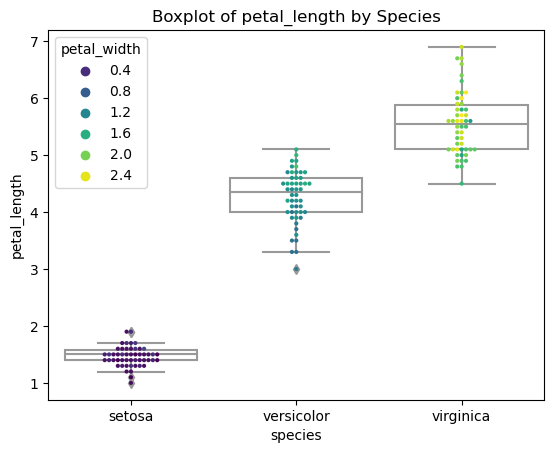

In [11]:

def boxplot(attribute, color_by):
        fig1, ax1 = plt.subplots()
        sb.boxplot(ax = ax1, x="species", y=attribute, data = df, color ="white")
        sb.swarmplot(ax = ax1, x="species", y=attribute, data = df, hue = color_by, size=3, palette="viridis")
        sb.color_palette("viridis", as_cmap=True)
        ax1.set_title(f"Boxplot of {attribute} by Species")
        fig1.savefig(f"Boxplot of {attribute} by Species")


boxplot("petal_length", "petal_width")

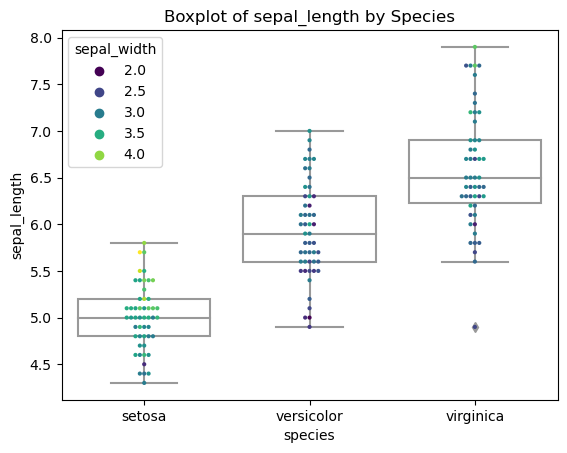

In [50]:
boxplot("sepal_length", "sepal_width")

### Species vs Petal Length:
**Students *t*-test**
*******************
- A students *t*-test is used to explore how the distribution of the response (e.g. petal length) differs across groups (species). 
- Below, an Independent Two Samples t-test is used to determine if there is a correlation between petal length and species through assessing whether differences in body mass between the two sexes are statistically significant. 
- An **Independent Samples *t*-test** should be performed to determine the statistical significance of this difference in group means.
- **Interpretation of the Independent Samples *t*-test**
- $\alpha$ = 0.05: This is the significance level. There is a 5% chance that the null hypothesis will be incorrectly accepted or rejected. 
- *p*-value $\le$ 0.05: A calculated significance probability less than the predetermined significance level indicates that the null hypothesis should be rejected in favour of the alternative hypothesis that there is a difference in the group means.   
- From the t-test performed, there is a statistically significant difference in petal length between the species. 


References:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html#scipy.stats.ttest_ind_from_stats
https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test
https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests


In [25]:
petal_length_by_species = df.groupby(["species"])["petal_length"]
mean_petal_length_by_species = petal_length_by_species.mean() #The mean of each group is required
std_petal_length_by_species = petal_length_by_species.std() #The standard deviation of each group is required 
count_by_species = petal_length_by_species.count()#The no. of data points in each group is required


#Scipy will perform an indenpendent 2 sample t-test on the groups and return the calculated t statistics and the p-value
#The test performed assumes equal variances within the two groups
scipy.stats.ttest_ind_from_stats(mean1 = mean_petal_length_by_species["versicolor"], std1 = std_petal_length_by_species ["versicolor"], nobs1 = count_by_species["versicolor"],
                                 mean2 = mean_petal_length_by_species["virginica"], std2 = std_petal_length_by_species ["virginica"], nobs2 = count_by_species["virginica"])

Ttest_indResult(statistic=-12.603779441384985, pvalue=3.1788195478061495e-22)

### Species vs Sepal Length: Oneway ANOVA
https://www.biostathandbook.com/onewayanova.html 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway